## Single LMDB Subdataset

In [20]:

import torch
from torch.utils.data import DataLoader, ConcatDataset
import pyxis.torch as pxt
from tqdm import tqdm


In [2]:
data_dir = "../dataset/processed"
subset_dir = "ratings_3_100/train/1_of_4"
sub_dataset = pxt.TorchDataset(os.path.join(data_dir, subset_dir))

print(len(sub_dataset))
print(sub_dataset)

44689
pyxis.Reader
Location:		'../dataset/processed/ratings_3_100/train/1_of_4'
Number of samples:	44689
Data keys (0th sample):
	'head_ids' <- dtype: int32, shape: (100,)
	'midtail_ids' <- dtype: int32, shape: (100,)
	'attention_masks' <- dtype: bool, shape: (100,)


## Multiple LMDB ConcatDataset

### Train set

In [11]:

train_data_dir = "../dataset/processed/comments_1_100/train"

# We should filter out only directory name excluding all the *.tar.gz files
subset_list = [subset_dir for subset_dir in os.listdir(train_data_dir) if os.path.isdir(os.path.join(train_data_dir, subset_dir))]
print('Available Chunk list:', subset_list)

train_dataset =  ConcatDataset([pxt.TorchDataset(os.path.join(train_data_dir, subset_dir)) for subset_dir in subset_list])
print('Full Dataset Len:', len(full_dataset))

Available Chunk list: ['1_of_14', '6_of_14', '3_of_14', '2_of_14', '4_of_14', '5_of_14', '7_of_14', '8_of_14', '9_of_14', '10_of_14', '11_of_14', '13_of_14', '12_of_14', '14_of_14']
Full Dataset Len: 4930192


1664789946.0


(array([      0.,   19809.,  191475.,  206123.,  365469.,  621587.,
        1374277., 1351797., 1354872., 1328317., 1298456., 1261086.,
        1217207., 1159647., 1092731., 1031296.,  970947.,  917774.,
         873557.,  830319.,  791696.,  754182.,  715830.,  680975.,
         645072.,  614171.,  581760.,  546430.,  513852.,  483889.,
         459972.,  439224.,  416052.,  395924.,  375462.,  358201.,
         343240.,  325731.,  311201.,  297013.,  283197.,  270530.,
         259589.,  246954.,  237180.,  226309.,  216751.,  208012.,
         198742.,  190789.]),
 array([ 0.  ,  1.98,  3.96,  5.94,  7.92,  9.9 , 11.88, 13.86, 15.84,
        17.82, 19.8 , 21.78, 23.76, 25.74, 27.72, 29.7 , 31.68, 33.66,
        35.64, 37.62, 39.6 , 41.58, 43.56, 45.54, 47.52, 49.5 , 51.48,
        53.46, 55.44, 57.42, 59.4 , 61.38, 63.36, 65.34, 67.32, 69.3 ,
        71.28, 73.26, 75.24, 77.22, 79.2 , 81.18, 83.16, 85.14, 87.12,
        89.1 , 91.08, 93.06, 95.04, 97.02, 99.  ]),
 <a list of 50 Patc

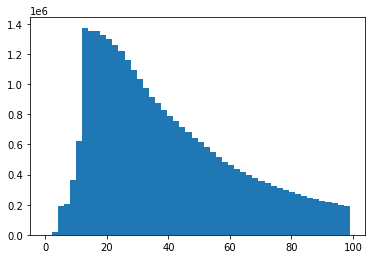

In [39]:
print( (train_list_char.mean()-2) * len(train_list_char))
plt.hist(train_list_char, bins=50, range=(0,99))


In [37]:
val_loader = DataLoader(train_dataset, batch_size=1000, shuffle=False, num_workers=16)
train_list_char = list()
for i, batch in tqdm(enumerate(val_loader), total=len(val_loader)):
    is_char = torch.sum(batch['head_ids'] != 0, dim=1)
    train_list_char.append(is_char)


train_list_char = torch.cat(train_list_char).numpy()
print()
print('Avg char length', train_list_char.mean()-2)
print(train_list_char.shape)


100%|██████████| 35497/35497 [12:19<00:00, 48.00it/s]

Avg char length 46.900736392210625
(35496030,)


### Validation Set

In [12]:

train_data_dir = "../dataset/processed/comments_1_100/val"

# We should filter out only directory name excluding all the *.tar.gz files
subset_list = [subset_dir for subset_dir in os.listdir(train_data_dir) if os.path.isdir(os.path.join(train_data_dir, subset_dir))]
print('Available Chunk list:', subset_list)

val_dataset =  ConcatDataset([pxt.TorchDataset(os.path.join(train_data_dir, subset_dir)) for subset_dir in subset_list])
print('Full Dataset Len:', len(full_dataset))

Available Chunk list: ['1_of_16', '2_of_16', '3_of_16', '4_of_16', '5_of_16', '6_of_16', '7_of_16', '8_of_16', '9_of_16', '10_of_16', '11_of_16', '12_of_16', '13_of_16', '14_of_16', '15_of_16', '16_of_16', '1_of_14', '2_of_14', '3_of_14', '4_of_14', '5_of_14', '6_of_14', '7_of_14', '8_of_14', '9_of_14', '10_of_14', '11_of_14', '12_of_14', '13_of_14', '14_of_14']
Full Dataset Len: 4930192


In [30]:
val_loader = DataLoader(val_dataset, batch_size=100, shuffle=False, num_workers=16)
list_char = list()
for i, batch in tqdm(enumerate(val_loader)):
    is_char = torch.sum(batch['head_ids'] != 0, dim=1)
    list_char.append(is_char)


list_char = torch.cat(list_char).numpy()
print()
print('Avg char length', list_char.mean()-2)
print(list_char.shape)


49302it [01:37, 506.26it/s]
Avg char length 45.84867567023759
(4930192,)



In [34]:
print( (list_char.mean()-2) * len(list_char))

226042774.0


(array([     0.,   2709.,  27380.,  30606.,  53691.,  91375., 201379.,
        197017., 195426., 190926., 186157., 179820., 173327., 164837.,
        154006., 145003., 136272., 129297., 121464., 115938., 110418.,
        104580.,  98943.,  94306.,  88915.,  84580.,  79690.,  75218.,
         70762.,  66546.,  63095.,  60116.,  57227.,  54203.,  51240.,
         49316.,  46597.,  44468.,  41905.,  40501.,  38333.,  36358.,
         34606.,  33445.,  32058.,  30541.,  29001.,  28083.,  26485.,
         25311.]),
 array([ 0.  ,  1.98,  3.96,  5.94,  7.92,  9.9 , 11.88, 13.86, 15.84,
        17.82, 19.8 , 21.78, 23.76, 25.74, 27.72, 29.7 , 31.68, 33.66,
        35.64, 37.62, 39.6 , 41.58, 43.56, 45.54, 47.52, 49.5 , 51.48,
        53.46, 55.44, 57.42, 59.4 , 61.38, 63.36, 65.34, 67.32, 69.3 ,
        71.28, 73.26, 75.24, 77.22, 79.2 , 81.18, 83.16, 85.14, 87.12,
        89.1 , 91.08, 93.06, 95.04, 97.02, 99.  ]),
 <a list of 50 Patch objects>)

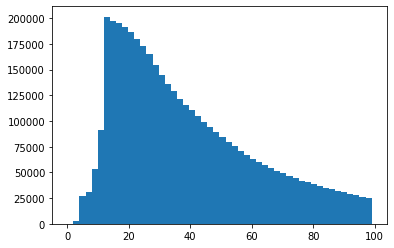

In [35]:
import matplotlib.pyplot as plt
plt.hist(list_char, bins=50, range=(0,99))


In [15]:
full_dataloader = DataLoader(full_dataset, batch_size=128, shuffle=True, num_workers=4)
for batch in full_dataloader:
    print("keys: ", batch.keys())

    print(batch['head_ids'])
    print(batch['head_ids'].shape)

    print(batch['midtail_ids'][0])
    print(batch['midtail_ids'].shape)

    print(batch['attention_masks'])
    print(batch['attention_masks'].shape)

    

    break

keys:  dict_keys(['head_ids', 'midtail_ids', 'attention_masks'])
tensor([[    1,   209,  5377,  ...,     0,     0,     0],
        [    1,   483, 12484,  ...,     0,     0,     0],
        [    1,   379,  9798,  ...,     0,     0,     0],
        ...,
        [    1,   549, 14212,  ...,     0,     0,     0],
        [    1,   237,  6106,  ...,     0,     0,     0],
        [    1,   360,  9303,  ...,     0,     0,     0]], dtype=torch.int32)
torch.Size([128, 100])
tensor([-100,  246,  225,  190,  253,    0,   29,  337,    2,  561,  561,    0,
           0,  565,    1,    0,  365,  130,  225,    0,   29,  561,  581,  521,
           0,    0,  569,  533,    0,  521,  337,  569,  253,    0,   78,   29,
           5,   30,  561,    0,    1,  569,    1,    0, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -

In [13]:
answer_label = batch['midtail_ids']
print(answer_label)
print(torch.sum(answer_label != -100).item())

answer_label[answer_label==0]=-100
print(torch.sum(answer_label != -100).item())



tensor([[-100,  522,  365,  ..., -100, -100, -100],
        [-100,  561,  533,  ..., -100, -100, -100],
        [-100,  561,  117,  ..., -100, -100, -100],
        ...,
        [-100,  569,  561,  ..., -100, -100, -100],
        [-100,  190,  253,  ..., -100, -100, -100],
        [-100,    1,   29,  ...,  141,    0, -100]], dtype=torch.int32)
4791
3535


In [14]:
batch['midtail_ids'][0]

tensor([-100,  522,  365,  513,  513, -100,   78,    5, -100,  225,  141,  533,
        -100,    2,  365,  509, -100,  513, -100,  185,  365,   29, -100,  365,
         133,  117, -100,  132, -100,   26,   21,    1, -100, -100,    1,  521,
         561, -100,  365, -100,  366, -100,  373,  189,    1, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
        -100, -100, -100, -100], dtype=torch.int32)